Import required utils

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import platform

Let run our mxm.c program to generate data

In [2]:
# C file and executable name
c_file = 'mxm.c'
executable = 'mxm'

# Compile the C program using GCC
os.system(f'gcc {c_file} -o {executable}')

# Run the compiled C program
os.system(f'./{executable}')

0

Let plot our datapoint

In [3]:
df_cputime = pd.read_csv('data/cputime.csv', delimiter=',')
df_cputime.head()

,BLOCK_SIZE,TIME
0,1,7028.817
1,2,3961.104
2,5,3135.054
3,8,3254.409
4,10,3501.572


In [4]:
df_bandwidth = pd.read_csv('data/bandwidth.csv', delimiter=',')
df_bandwidth.head()

,BLOCK_SIZE,BANDWIDTH
0,1,1.085445
1,2,1.926078
2,5,2.433577
3,8,2.344326
4,10,2.178848


In [5]:
def plot(x, y, x_label, y_label, title):
    plt.figure(figsize=(10,5))
    plt.plot(x, y, marker='o', label="data point")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='upper right')

    system_info     = f"System: {platform.system()} {platform.release()}\n"
    processor_info  = f"Processor: {platform.processor()}\n"
    cpu_info        = f"CPU: {os.cpu_count()} cores\n"
    plt.title(title + '\n' + system_info + processor_info + cpu_info)

    plt.show()

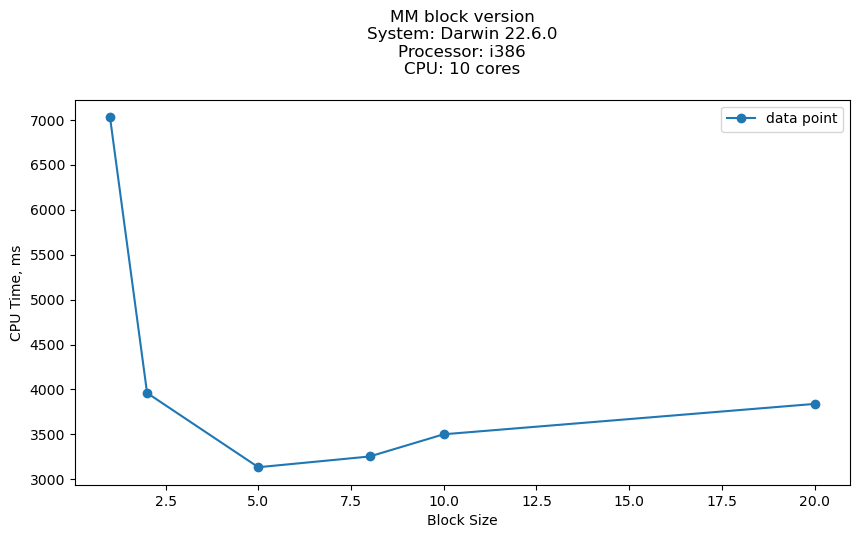

In [6]:
# CPUTIME
plot(df_cputime.iloc[:,0], df_cputime.iloc[:,1], 'Block Size', 'CPU Time, ms', 'MM block version')

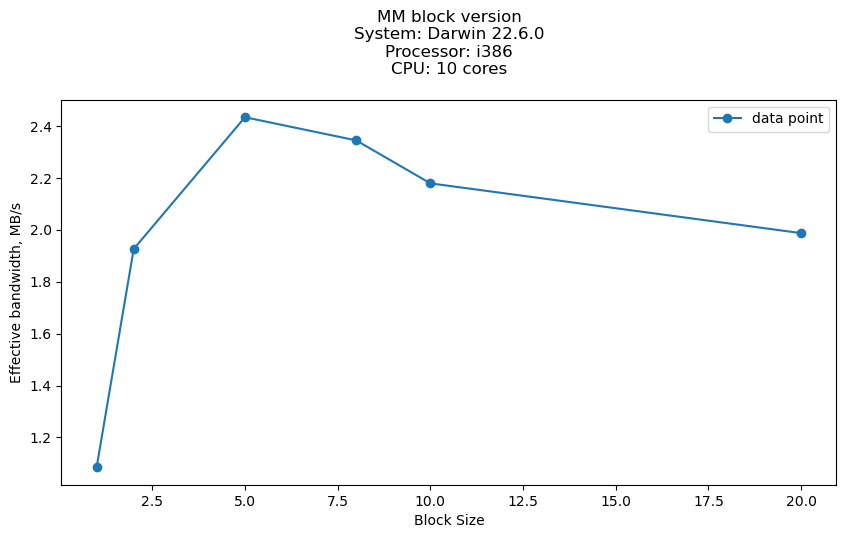

In [7]:
# BANDWIDTH
plot(df_bandwidth.iloc[:,0], df_bandwidth.iloc[:,1], 'Block Size', 'Effective bandwidth, MB/s', 'MM block version')

CONCLUSION

- A larger block size allows for more efficient matrix multiplication, resulting in faster execution times.</li>
- Bandwidth generally decreases as the block size increases. We could say that as block sizes grow, the locality of data in cache memory may decrease, leading to more cache misses and reduced bandwidth